##Question 4

###Part A

Calculate Geadient:

$$\nabla f(x) = \begin{bmatrix} \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2} \end{bmatrix}$$

$$\frac{\partial f}{\partial x_1} = -400(x_2 - x_1^2)x_1 - 2(1 - x_1) = -400x_1x_2 + 400x_1^3 + 2x_1 - 2$$

$$\frac{\partial f}{\partial x_2} = 200(x_2 - x_1^2)$$

$$\text{Therefore, } \nabla f(x) = \begin{bmatrix} -400x_1x_2 + 400x_1^3 + 2x_1 - 2, & 200(x_2 - x_1^2) \end{bmatrix}^T$$

Calculate Hessian:

$$H(x) = \begin{bmatrix} \frac{\partial^2 f}{\partial x_1^2} & \frac{\partial^2 f}{\partial x_1 \partial x_2} \\ \frac{\partial^2 f}{\partial x_2 \partial x_1} & \frac{\partial^2 f}{\partial x_2^2} \end{bmatrix}$$

$$\frac{\partial^2 f}{\partial x_1^2} = -400x_2 + 1200x_1^2 + 2$$

$$\frac{\partial^2 f}{\partial x_1 \partial x_2} = -400x_1$$

$$\frac{\partial^2 f}{\partial x_2^2} = 200$$

$$\text{Therefore, } H(x) = \begin{bmatrix} -400x_2 + 1200x_1^2 + 2 & -400x_1 \\ -400x_1 & 200 \end{bmatrix}$$

###Part B

In [44]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def gradient(x):
    return np.array([-400*x[0]*(x[1] - x[0]**2) - 2*(1 - x[0]), 200*(x[1] - x[0]**2)])

def hessian(x):
    return np.array([[-400*x[1] + 1200*x[0]**2 + 2, -400*x[0]], [-400*x[0], 200]])

def steepest_descent(x0, learning_rate=0.0005, iterations=1000000, tolerance=1e-8):
    x = x0.copy()
    path = [x.copy()]
    values = [f(x)]
    for i in range(iterations):
        grad = gradient(x)
        grad_norm = np.linalg.norm(grad)
        if grad_norm < tolerance:
            print(f"Steepest descent converged at iteration {i} with gradient norm {grad_norm}")
            break

        alpha = learning_rate
        c = 0.3
        rho = 0.8

        while f(x - alpha * grad) > f(x) - c * alpha * np.dot(grad, grad):
            alpha *= rho
            if alpha < 1e-12:
                print("Line search failed. Breaking inner loop.")
                break
        if alpha < 1e-12:
            print("Line search failed. Breaking outer loop.")
            break
        x = x - alpha * grad
        path.append(x.copy())
        values.append(f(x))
    return np.array(path), np.array(values)

def newton_method(x0, iterations=100, tolerance=1e-8):
    x = x0.copy()
    path = [x.copy()]
    values = [f(x)]

    for i in range(iterations):
        grad = gradient(x)
        hess = hessian(x)
        grad_norm = np.linalg.norm(grad)
        if grad_norm < tolerance:
            print(f"Newton's method converged at iteration {i} with gradient norm {grad_norm}")
            break
        try:
            delta_x = np.linalg.solve(hess, -grad)
            x = x + delta_x
        except np.linalg.LinAlgError:
            print("Hessian is singular. Newton's method failed.")
            break

        path.append(x.copy())
        values.append(f(x))

    return np.array(path), np.array(values)

x0 = np.array([-4, 10])

sd_path, sd_values = steepest_descent(x0)
print("Steepest Descent:")
print("Final x:", sd_path[-1])
print("Final f(x):", sd_values[-1])

print("\n")

nm_path, nm_values = newton_method(x0)
print("Newton's Method:")
print("Final x:", nm_path[-1])
print("Final f(x):", nm_values[-1])

Steepest descent converged at iteration 104431 with gradient norm 9.999644310329768e-09
Steepest Descent:
Final x: [0.99999999 0.99999998]
Final f(x): 1.251911713503684e-16


Newton's method converged at iteration 5 with gradient norm 4.697353617189037e-12
Newton's Method:
Final x: [1. 1.]
Final f(x): 5.516282751229733e-24


###Part C

Steepest Descent method is simple, guaranteed to converge (with a suitable learning rate) but can be slow, especially near the optimum. It zig-zags towards the minimum. As observed, while the steepest descent method required significantly more iterations than Newton's method, it approached the optimal point closely but did not reach the exact solution.

Newton's Method converges much faster (quadratic convergence) when the Hessian is positive definite and well-conditioned. However, it requires calculating the Hessian, which can be computationally expensive, and it can fail if the Hessian is singular or not positive definite. As observed, newton's method reached true optimal point in only 5 iterations.

A common strategy is to start with Steepest Descent to get closer to the minimum and then switch to Newton's method for faster convergence in the vicinity of the optimal point.

###Part D

Steepest descent converged at iteration 104431 with gradient norm 9.999644310329768e-09
Steepest Descent:
Final x: [0.99999999 0.99999998]
Final f(x): 1.251911713503684e-16


Newton's method converged at iteration 5 with gradient norm 4.697353617189037e-12
Newton's Method:
Final x: [1. 1.]
Final f(x): 5.516282751229733e-24




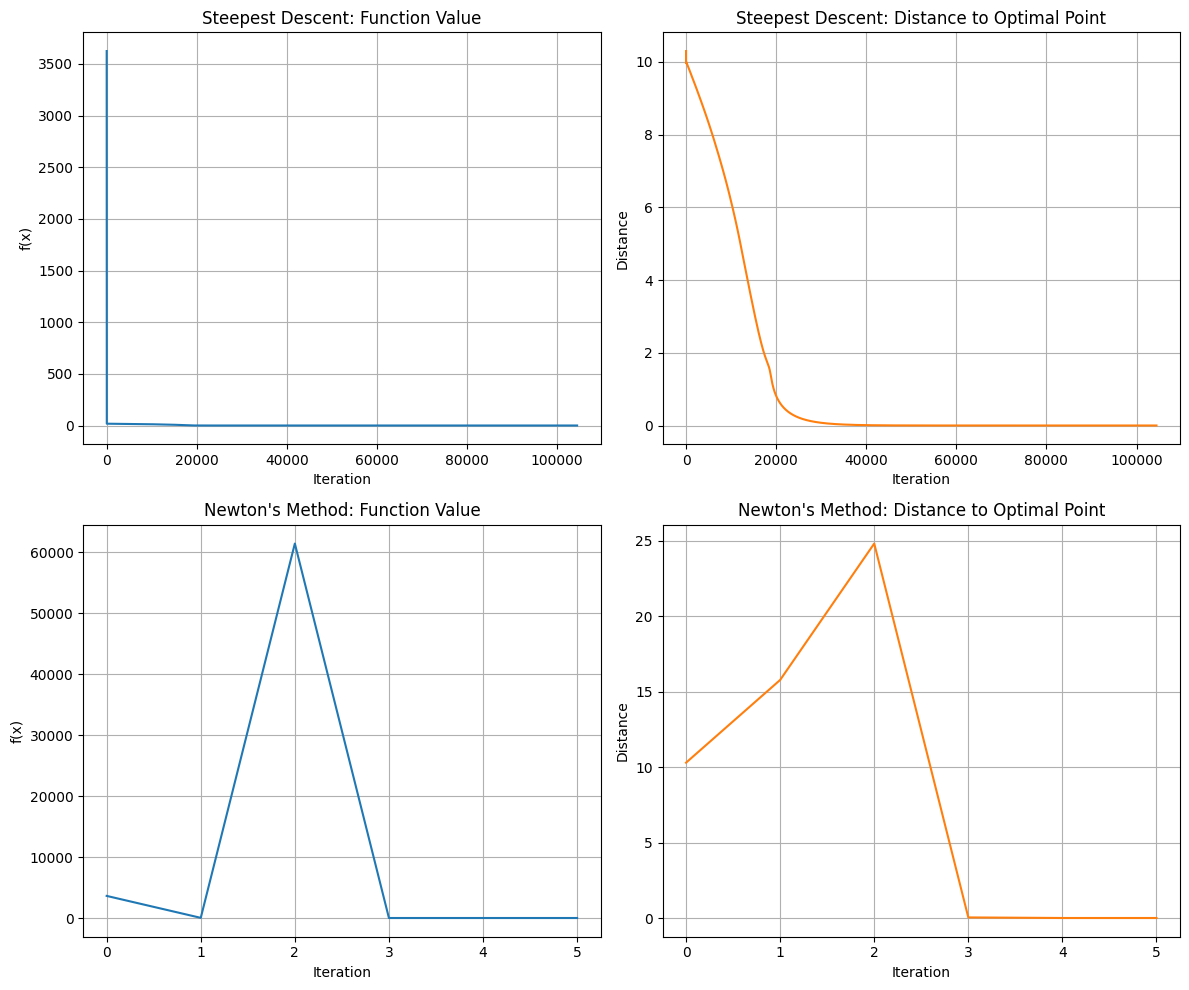

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

def gradient(x):
    return np.array([-400*x[0]*(x[1] - x[0]**2) - 2*(1 - x[0]), 200*(x[1] - x[0]**2)])

def hessian(x):
    return np.array([[-400*x[1] + 1200*x[0]**2 + 2, -400*x[0]], [-400*x[0], 200]])

def steepest_descent(x0, learning_rate=0.0005, iterations=1000000, tolerance=1e-8):
    x = x0.copy()
    path = [x.copy()]
    values = [f(x)]
    distances = [np.linalg.norm(x - np.array([1, 1]))]

    for i in range(iterations):
        grad = gradient(x)
        grad_norm = np.linalg.norm(grad)
        if grad_norm < tolerance:
            print(f"Steepest descent converged at iteration {i} with gradient norm {grad_norm}")
            break

        alpha = learning_rate
        c = 0.3
        rho = 0.8

        while f(x - alpha * grad) > f(x) - c * alpha * np.dot(grad, grad):
            alpha *= rho
            if alpha < 1e-12:
                print("Line search failed. Breaking inner loop.")
                break
        if alpha < 1e-12:
            print("Line search failed. Breaking outer loop.")
            break
        x = x - alpha * grad
        path.append(x.copy())
        values.append(f(x))
        distances.append(np.linalg.norm(x - np.array([1, 1])))

    return np.array(path), np.array(values), np.array(distances)

def newton_method(x0, iterations=100, tolerance=1e-8):
    x = x0.copy()
    path = [x.copy()]
    values = [f(x)]
    distances = [np.linalg.norm(x - np.array([1, 1]))]

    for i in range(iterations):
        grad = gradient(x)
        hess = hessian(x)
        grad_norm = np.linalg.norm(grad)
        if grad_norm < tolerance:
            print(f"Newton's method converged at iteration {i} with gradient norm {grad_norm}")
            break
        try:
            delta_x = np.linalg.solve(hess, -grad)
            x = x + delta_x
        except np.linalg.LinAlgError:
            print("Hessian is singular. Newton's method failed.")
            break

        path.append(x.copy())
        values.append(f(x))
        distances.append(np.linalg.norm(x - np.array([1, 1])))

    return np.array(path), np.array(values), np.array(distances)

x0 = np.array([-4, 10])


gd_path, gd_values, gd_distances = steepest_descent(x0)

print("Steepest Descent:")
print("Final x:", gd_path[-1])
print("Final f(x):", gd_values[-1])

print("\n")

nm_path, nm_values, nm_distances = newton_method(x0)

print("Newton's Method:")
print("Final x:", nm_path[-1])
print("Final f(x):", nm_values[-1])

print("\n")

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

axs[0, 0].plot(gd_values, color='tab:blue')
axs[0, 0].set_xlabel('Iteration')
axs[0, 0].set_ylabel('f(x)')
axs[0, 0].set_title('Steepest Descent: Function Value')
axs[0, 0].grid(True)

axs[0, 1].plot(gd_distances, color='tab:orange')
axs[0, 1].set_xlabel('Iteration')
axs[0, 1].set_ylabel('Distance')
axs[0, 1].set_title('Steepest Descent: Distance to Optimal Point')
axs[0, 1].grid(True)

axs[1, 0].plot(nm_values, color='tab:blue')
axs[1, 0].set_xlabel('Iteration')
axs[1, 0].set_ylabel('f(x)')
axs[1, 0].set_title('Newton\'s Method: Function Value')
axs[1, 0].grid(True)

axs[1, 1].plot(nm_distances, color='tab:orange')
axs[1, 1].set_xlabel('Iteration')
axs[1, 1].set_ylabel('Distance')
axs[1, 1].set_title('Newton\'s Method: Distance to Optimal Point')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


**Steepest Descent**

The "Steepest Descent: Function Value" plot shows a rapid initial decrease in the function value f(x) during the first few iterations (approximately within the first 10,000 iterations). After this initial drop, the convergence slows down significantly. The function value continues to decrease, but at a much slower rate, even after 60,000 iterations.

The "Steepest Descent: Distance to Optimal Point" plot mirrors the function value plot. The distance to the optimal point decreases quickly at first and then slows down considerably. This indicates that Steepest Descent is making good progress initially but struggles to get very close to the minimum.

**Newton's method**

The "Newton's Method: Function Value" plot is quite different. It shows a very rapid decrease in the function value within just a few iterations (around 3-4 iterations). However, there's a large spike in the function value at iteration 2.

The "Newton's Method: Distance to Optimal Point" plot confirms this behavior. The distance initially increases at iteration 2, but then drops dramatically to near zero by iteration 3-4.

**The spike at iteration 2** in Newton's method is most likely due to the Hessian matrix not being positive definite at that particular point. Newton's method relies on the Hessian being positive definite to guarantee a descent direction. When the Hessian is not positive definite, the Newton step can point in an ascent direction, causing the function value and distance to increase. After this "bad" step, the method recovers and converges very quickly.